### 一.算法推导
Gibbs算法其实就是单分量MH算法中，建议分布取满条件概率分布的特殊情况，即：    

$$
q(x_j^{(i-1)}\rightarrow x_j^{'(i)} \mid x_{-j}^{(i)})=p(x_j^{'(i)} \mid x_{-j}^{(i)})
$$   

那自然的，我们接下来还会关心接收概率$\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})$的情况：   

$$
\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})=min\{1,\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})q(x_j^{'(i)}\rightarrow x_j^{(i-1)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})q(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})}\}=min\{1,\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})p(x_j^{(i-1)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})p(x_j^{'(i)}\mid x_{-j}^{(i)})}\}=min\{1,1\}=1
$$  

接受率竟然始终为1，始终不会拒绝样本！所以Gibbs采样是一种特别高效的方法，下面直接说下采样流程

###  二.Gibbs采样流程
输入：目标概率分布的密度函数$p(x)$，正整数$m,n,m<n$；   
输出：$p(x)$的随机样本$x_{m+1},x_{m+2},...,x_n$

>（1）初始化样本$x^{(0)}=(x_1^{(0)},x_2^{(0)},...,x_k^{(0)})$   

>（2）对$i=1,2,...,m,m+1,...n$：   

>>对$j=1,2,...,k$：   

>>>根据建议分布$p(x_j\mid x_{-j}^{(i)})$抽样第$j$维数据$x_j^{'(i)}$，并令$x_j^{(i)}=x_j^{'(i)}$   
  

>（3）返回样本集$\{x_{m+1},x_{m+2},...,x_n\}$  

### 三.案例
例子就用前一节的，直观感受一下与单分量MH的不同...公式部分就不码了...

In [1]:
import os
os.chdir('../')
# from ml_models import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义均值，协方差
u=np.asarray([0,0])
sigma=np.asarray([[1,0.5],
                  [0.5,1]])

In [3]:
import copy
#采样的样本量
nums=1000
count=0
points=[]
#采样x0
point=[np.random.randn(),np.random.randn()]
points.append(point)
while count<nums:
    new_point=copy.deepcopy(point) #深度copy
    for k in (0,1):
        # 按照满条件概率分布采样
        new_point[k]=(np.random.randn()+0.5*new_point[(k+1)%2])*0.75
    point=new_point
    print(point)
    points.append(point)
    count+=1

[-0.31752318322801426, 1.2143945910987912]
[1.0512642254256286, 0.6598884210428457]
[0.8606114583709252, 1.0819375941204457]
[0.5477390840459155, 0.7725576018785769]
[1.732871971208255, 0.8812386083228572]
[0.23535079592423325, 0.49885967440095386]
[-0.2064237282254246, -0.245766902327749]
[-0.1760637259631353, 1.10023657621579]
[-0.4312227604304996, -1.385262658734546]
[-0.03623512766784495, 0.3864758243858545]
[0.6040455578888031, -0.3477835776054763]
[-0.471246920807194, 1.3456257290942304]
[0.6062512577684596, 1.0054273295614626]
[-0.7421720840920933, 0.37192231331089]
[-0.9940728288237295, 0.10383056649428665]
[0.7494118216226584, -0.7645573143869578]
[0.4179207607508925, 0.3855140727841331]
[-0.6965006996410352, -0.009850272920168796]
[-0.8098007138376588, -0.13310412099970503]
[-0.8821887880597242, -0.5796200853508846]
[-0.5535815609403242, -0.1897866395369051]
[0.39706108579985716, 0.4781864930322194]
[1.0453774858462144, 0.47490025965728416]
[1.1010137361019434, -1.29995357697

In [4]:

"""
绘制等高线
"""


def plot_contourf(data, func, lines=3):
    n = 256
    x = np.linspace(data[:, 0].min(), data[:, 0].max(), n)
    y = np.linspace(data[:, 1].min(), data[:, 1].max(), n)
    X, Y = np.meshgrid(x, y)
    C = plt.contour(X, Y, func(np.c_[X.reshape(-1), Y.reshape(-1)]).reshape(X.shape), lines, colors='g', linewidth=0.5)
    plt.clabel(C, inline=True, fontsize=10)
    plt.scatter(data[:, 0], data[:, 1])

def gaussian_nd(x, u, sigma):
    """
    高维高斯函数
    :param x:
    :param u:
    :param sigma:
    :return:
    """
    if x.ndim == 1:
        x = np.expand_dims(x, axis=0)
    return 1.0 / (np.power(2 * np.pi, x.shape[1] / 2) * np.sqrt(np.linalg.det(sigma))) * np.exp(
        np.sum(-0.5 * (x - u).dot(np.linalg.inv(sigma)) * (x - u), axis=1))

D:\Python\Anaconda3\envs\tf23\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


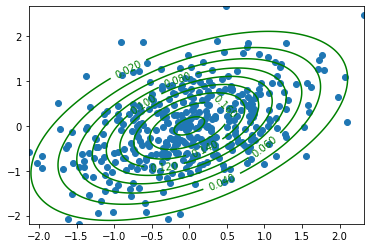

In [6]:
plot_contourf(np.asarray(points[-400:]),lambda x:gaussian_nd(x,u,sigma),10)

### 四.小结
对比一下Gibbs采样和单分量MH直接的异同点：   

先说相同的地方：（1）两者都是要在满条件分布可用的前提下才能使用； （2）Gibbs采样是单分量MH的特殊情况，即建议分布取满条件概率分布的情况；    

再说不同的地方：（1）满条件概率分布好采样时用Gibbs，不好采用时用单分量MH；（2）单分量MH有拒绝抽样的情况，而Gibbs采样全部接受   

下面再补充一副关系图对抽样这一章的内容做总结   


![avatar](./source/12_MCMC总结.png)